In [2]:
import sklearn
from sklearn.utils import shuffle
from sklearn import datasets
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

# Load libraries
import seaborn as sns
import numpy
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

df = pd.read_csv('breast-cancer.csv')


le = preprocessing.LabelEncoder()
id =le.fit_transform(list(df['id']))
diagnosis = le.fit_transform(list(df['diagnosis']))
radius_m = le.fit_transform(list(df['radius_mean']))
texture_m =le.fit_transform(list(df['texture_mean']))
perimeter_m = le.fit_transform(list(df['perimeter_mean']))
area_m=le.fit_transform(list(df['area_mean']))
smoothness_m = le.fit_transform(list(df['smoothness_mean']))
compactness_m = le.fit_transform(list(df['compactness_mean']))
concavity_m = le.fit_transform(list(df['concavity_mean']))
concave_m = le.fit_transform(list(df['concave points_mean']))
symmetry_m = le.fit_transform(list(df['symmetry_mean']))
frac_dim_m = le.fit_transform(list(df['fractal_dimension_mean']))

radius_se= le.fit_transform(list(df['radius_se']))
texture_se = le.fit_transform(list(df['texture_se']))
perimeter_se = le.fit_transform(list(df['perimeter_se']))
area_se= le.fit_transform(list(df['area_se']))
smoothness_se = le.fit_transform(list(df['smoothness_se']))
compactness_se= le.fit_transform(list(df['compactness_se']))
concavity_se= le.fit_transform(list(df['concavity_se']))
concave_point_se= le.fit_transform(list(df['concave points_se']))
symmetry_se = le.fit_transform(list(df['symmetry_se']))
frac_dim_se = le.fit_transform(list(df['fractal_dimension_se']))

radius_worst= le.fit_transform(list(df['radius_worst']))
texture_worst = le.fit_transform(list(df['texture_worst']))
perimeter_worst= le.fit_transform(list(df['perimeter_worst']))
area_worst = le.fit_transform(list(df['area_worst']))
smoothness_worst= le.fit_transform(list(df['smoothness_worst']))
compactness_worst= le.fit_transform(list(df['compactness_worst']))
concavity_worst= le.fit_transform(list(df['concavity_worst']))
concave_point_worst= le.fit_transform(list(df['concave points_worst']))
symmetry_worst= le.fit_transform(list(df['symmetry_worst']))
frac_dim_worst= le.fit_transform(list(df['fractal_dimension_worst']))

In [3]:
perameters = (radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concave_m,concavity_m,symmetry_m,frac_dim_m,radius_se, texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,frac_dim_se, radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,frac_dim_worst)

x = list(zip(radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concave_m,concavity_m,symmetry_m,frac_dim_m,radius_se, texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,frac_dim_se, radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,frac_dim_worst))
y = list(diagnosis)
num_folds = 5
seed = 7
scoring = 'accuracy'

In [4]:
mean=list(zip(radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concave_m,concavity_m,symmetry_m,frac_dim_m))
se=list(zip(radius_se, texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,frac_dim_se))
worst=list(zip( radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,frac_dim_worst))
no_se=list(zip(radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concave_m,concavity_m,symmetry_m,frac_dim_m,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,frac_dim_worst))


In [5]:
all_radius= list(zip(radius_m,radius_se,radius_worst))
all_texture = list(zip(texture_m,texture_se,texture_worst))
all_perimeter = list(zip(perimeter_m,perimeter_se,perimeter_worst))
all_area = list(zip(area_m,area_se,area_worst))
all_smoothnes= list(zip(smoothness_m,smoothness_se,smoothness_worst))
all_compactness = list(zip(compactness_m,compactness_se,compactness_worst))
all_concave=list(zip(concave_m,concave_point_se,concave_point_worst))
all_concavity = list(zip(concavity_m,concavity_se,concavity_worst))
all_symmetry =list(zip(symmetry_m,symmetry_se,symmetry_worst))
all_fractdim = list(zip(frac_dim_m,frac_dim_se,frac_dim_worst))

In [9]:
df.shape

(569, 32)

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

<ipython-input-36-891d8cb5f05a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax,bins =30)


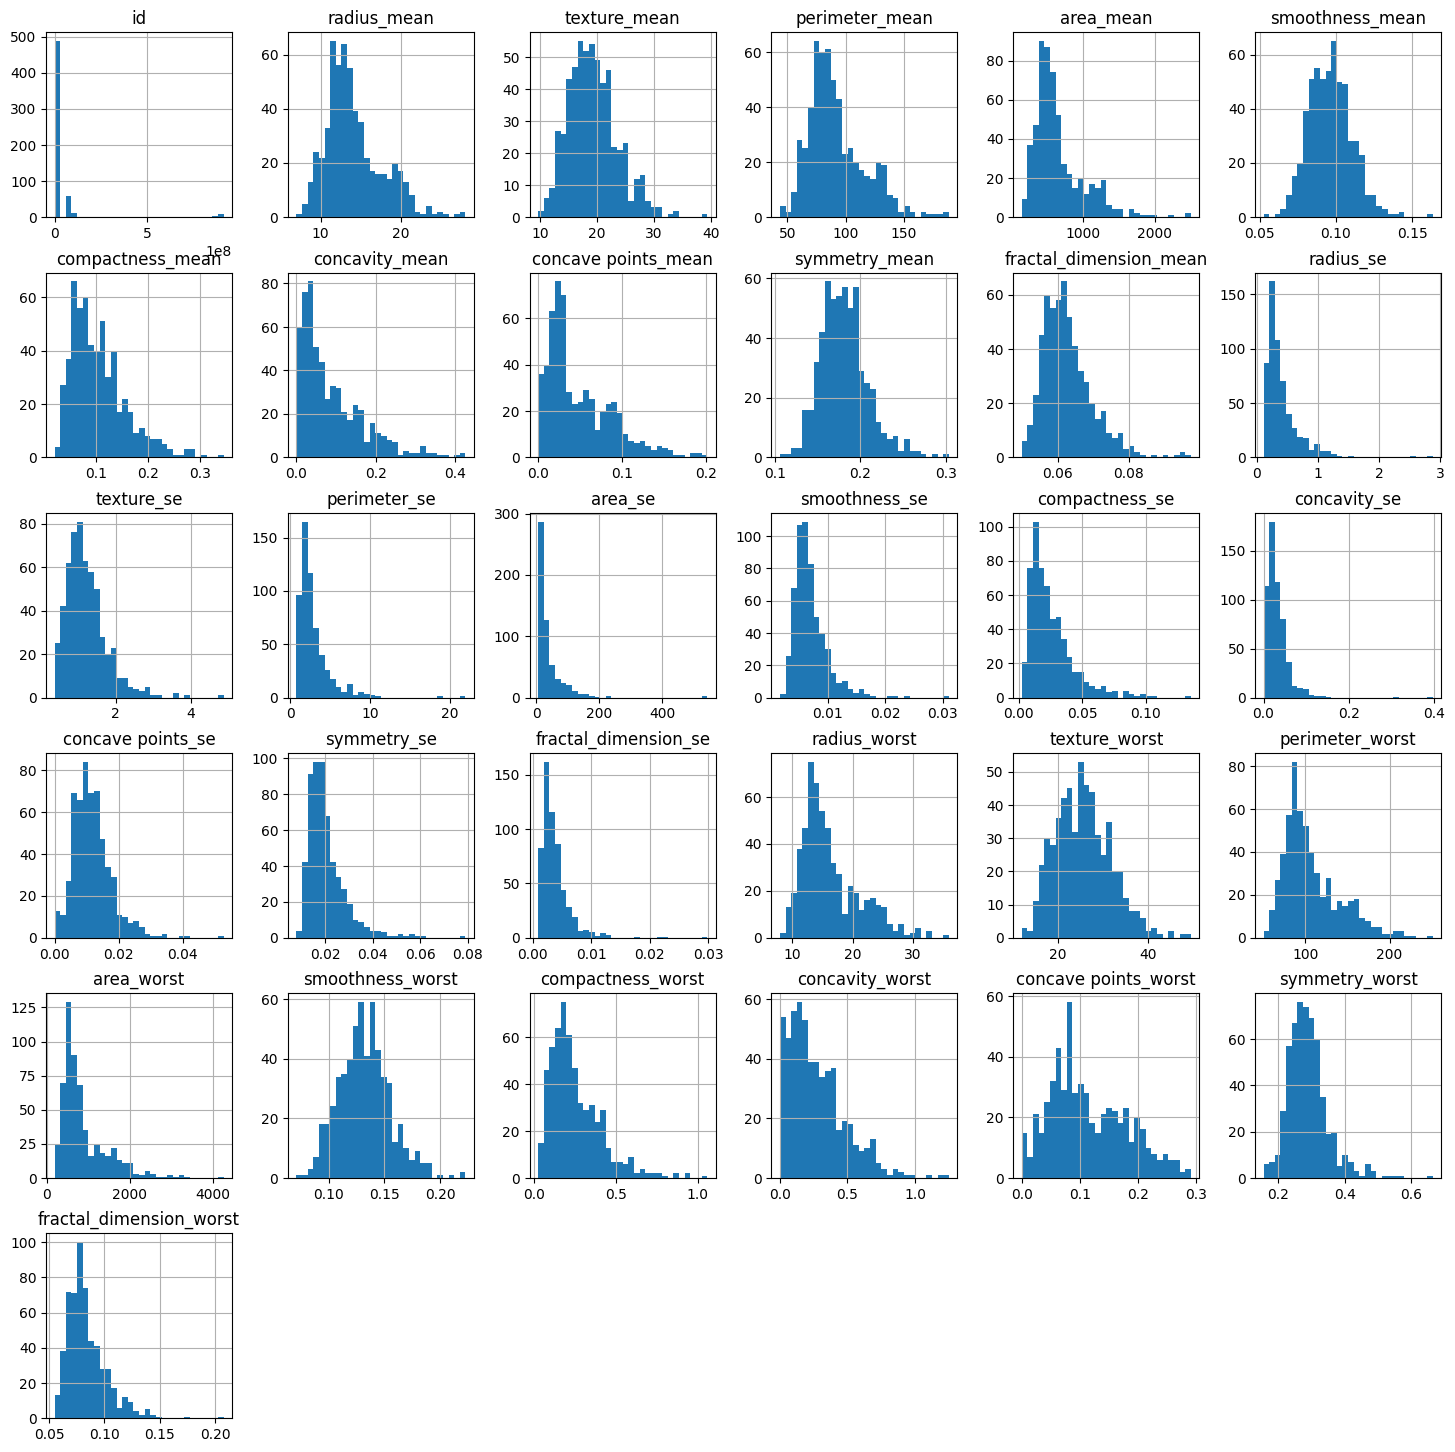

In [36]:

#3. Visualising data distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()


In [12]:
df.nunique()


id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<ipython-input-11-b58145cf451f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax,bins =30)


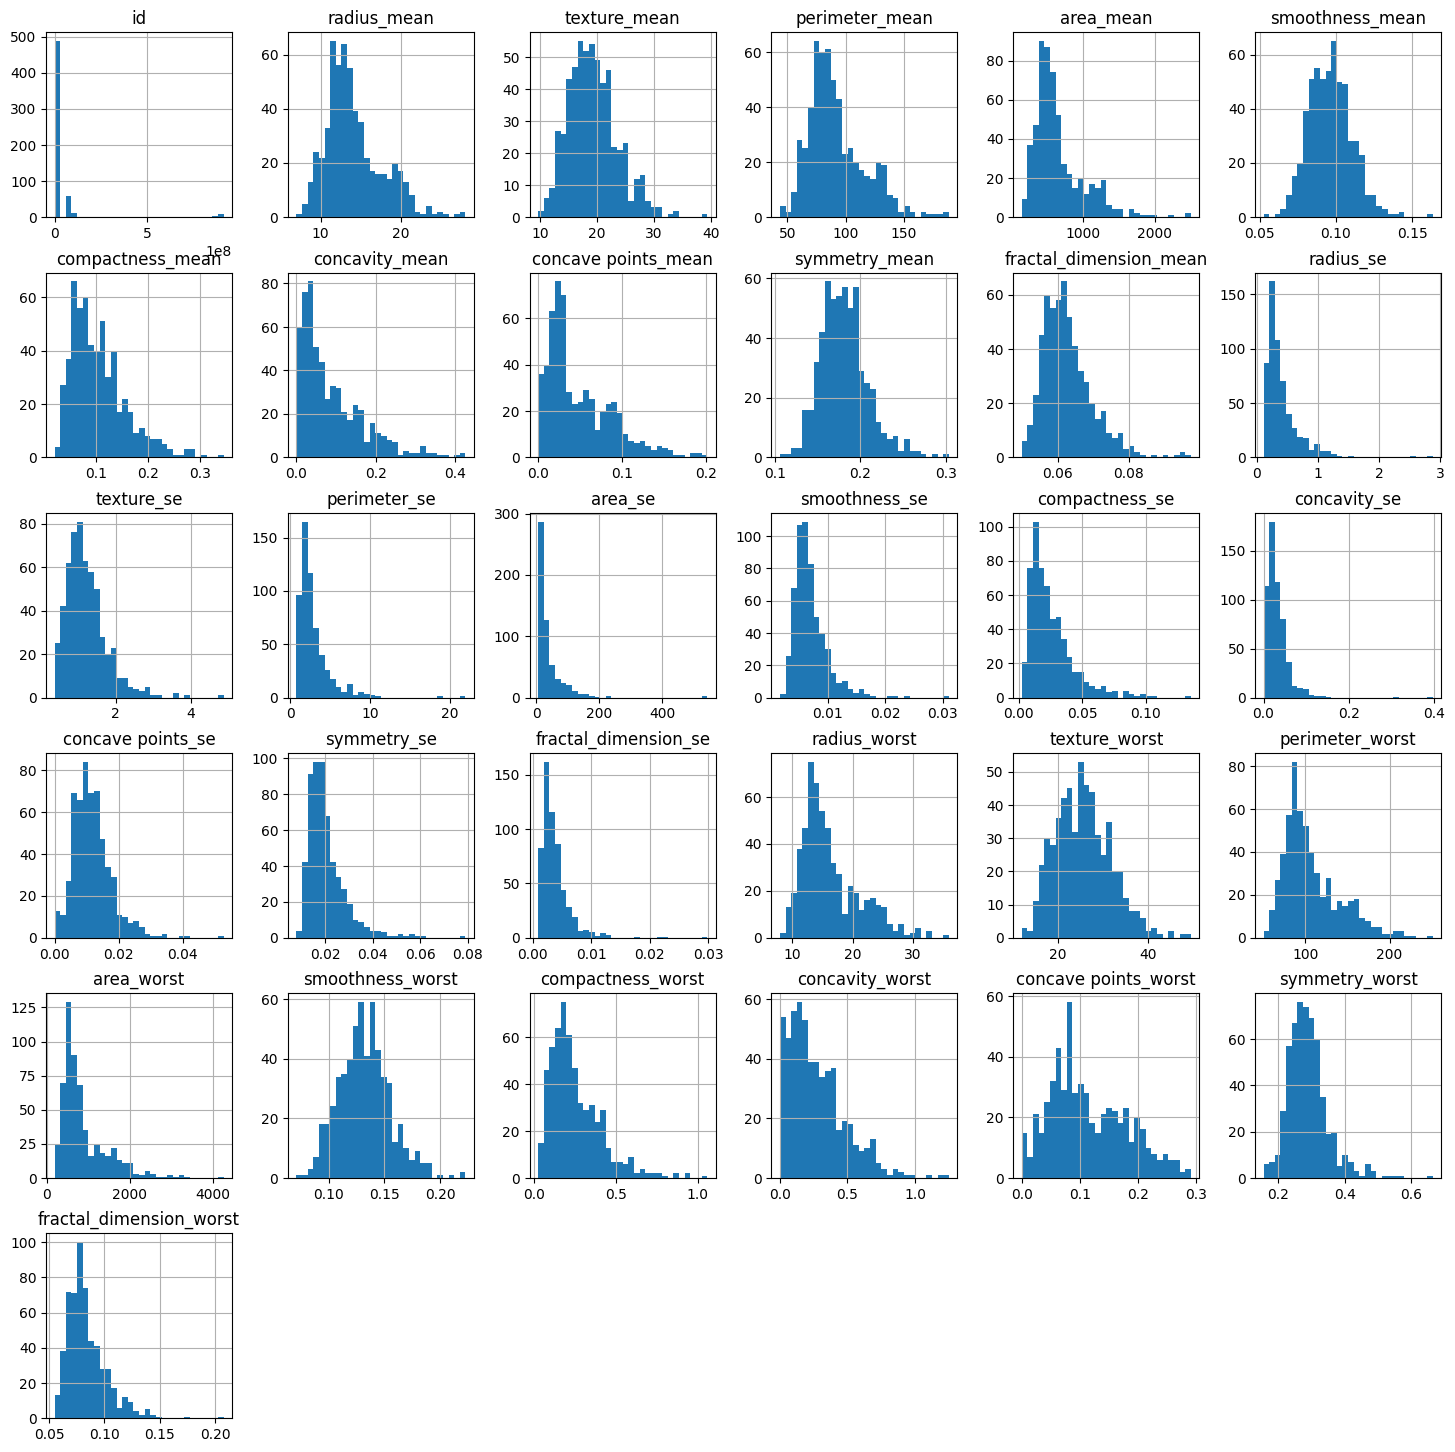

In [11]:
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

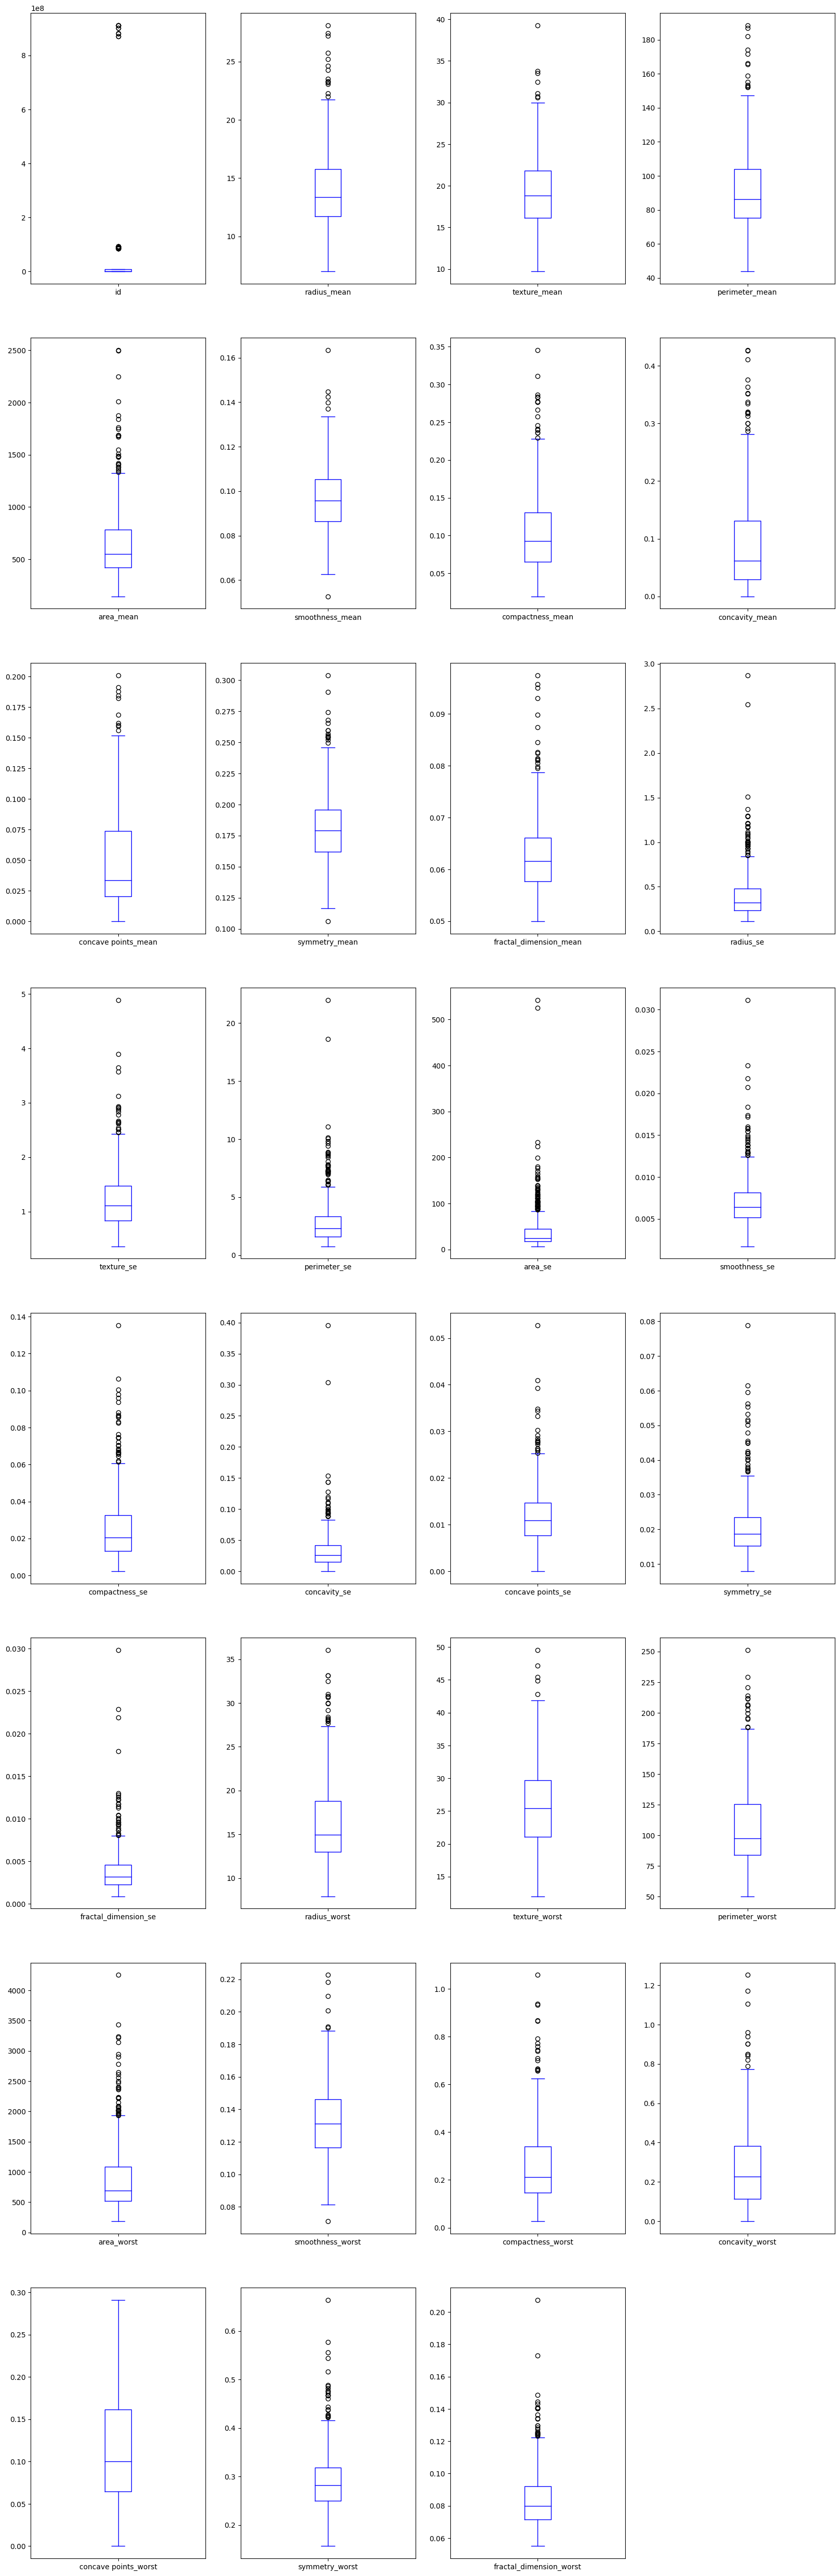

In [27]:
df.plot(kind='box', subplots=True, layout=(10,4),sharex=False,sharey=False, figsize=(20, 80), color='blue');


In [34]:
continous_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concave points_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])


For the feature radius_mean, No of Outliers is 14
For the feature texture_mean, No of Outliers is 7
For the feature perimeter_mean, No of Outliers is 13
For the feature area_mean, No of Outliers is 25
For the feature smoothness_mean, No of Outliers is 6
For the feature compactness_mean, No of Outliers is 16
For the feature concave points_mean, No of Outliers is 10
For the feature concavity_mean, No of Outliers is 18
For the feature symmetry_mean, No of Outliers is 15
For the feature fractal_dimension_mean, No of Outliers is 15
For the feature radius_se, No of Outliers is 38
For the feature texture_se, No of Outliers is 20
For the feature perimeter_se, No of Outliers is 38
For the feature area_se, No of Outliers is 65
For the feature smoothness_se, No of Outliers is 30
For the feature compactness_se, No of Outliers is 28
For the feature concavity_se, No of Outliers is 22
For the feature concave points_se, No of Outliers is 19
For the feature symmetry_se, No of Outliers is 27
For the fea

B    357
M    212
Name: diagnosis, dtype: int64


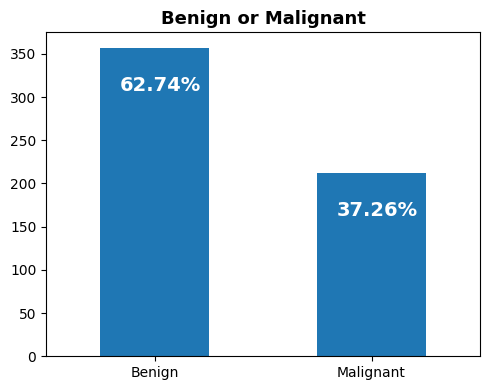

In [40]:
print(df.diagnosis.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Benign", "Malignant"]
ax = df.diagnosis.value_counts().plot(kind='bar')
ax.set_title("Benign or Malignant", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()


<ipython-input-22-251f398c2265>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=2, cmap="Blues")


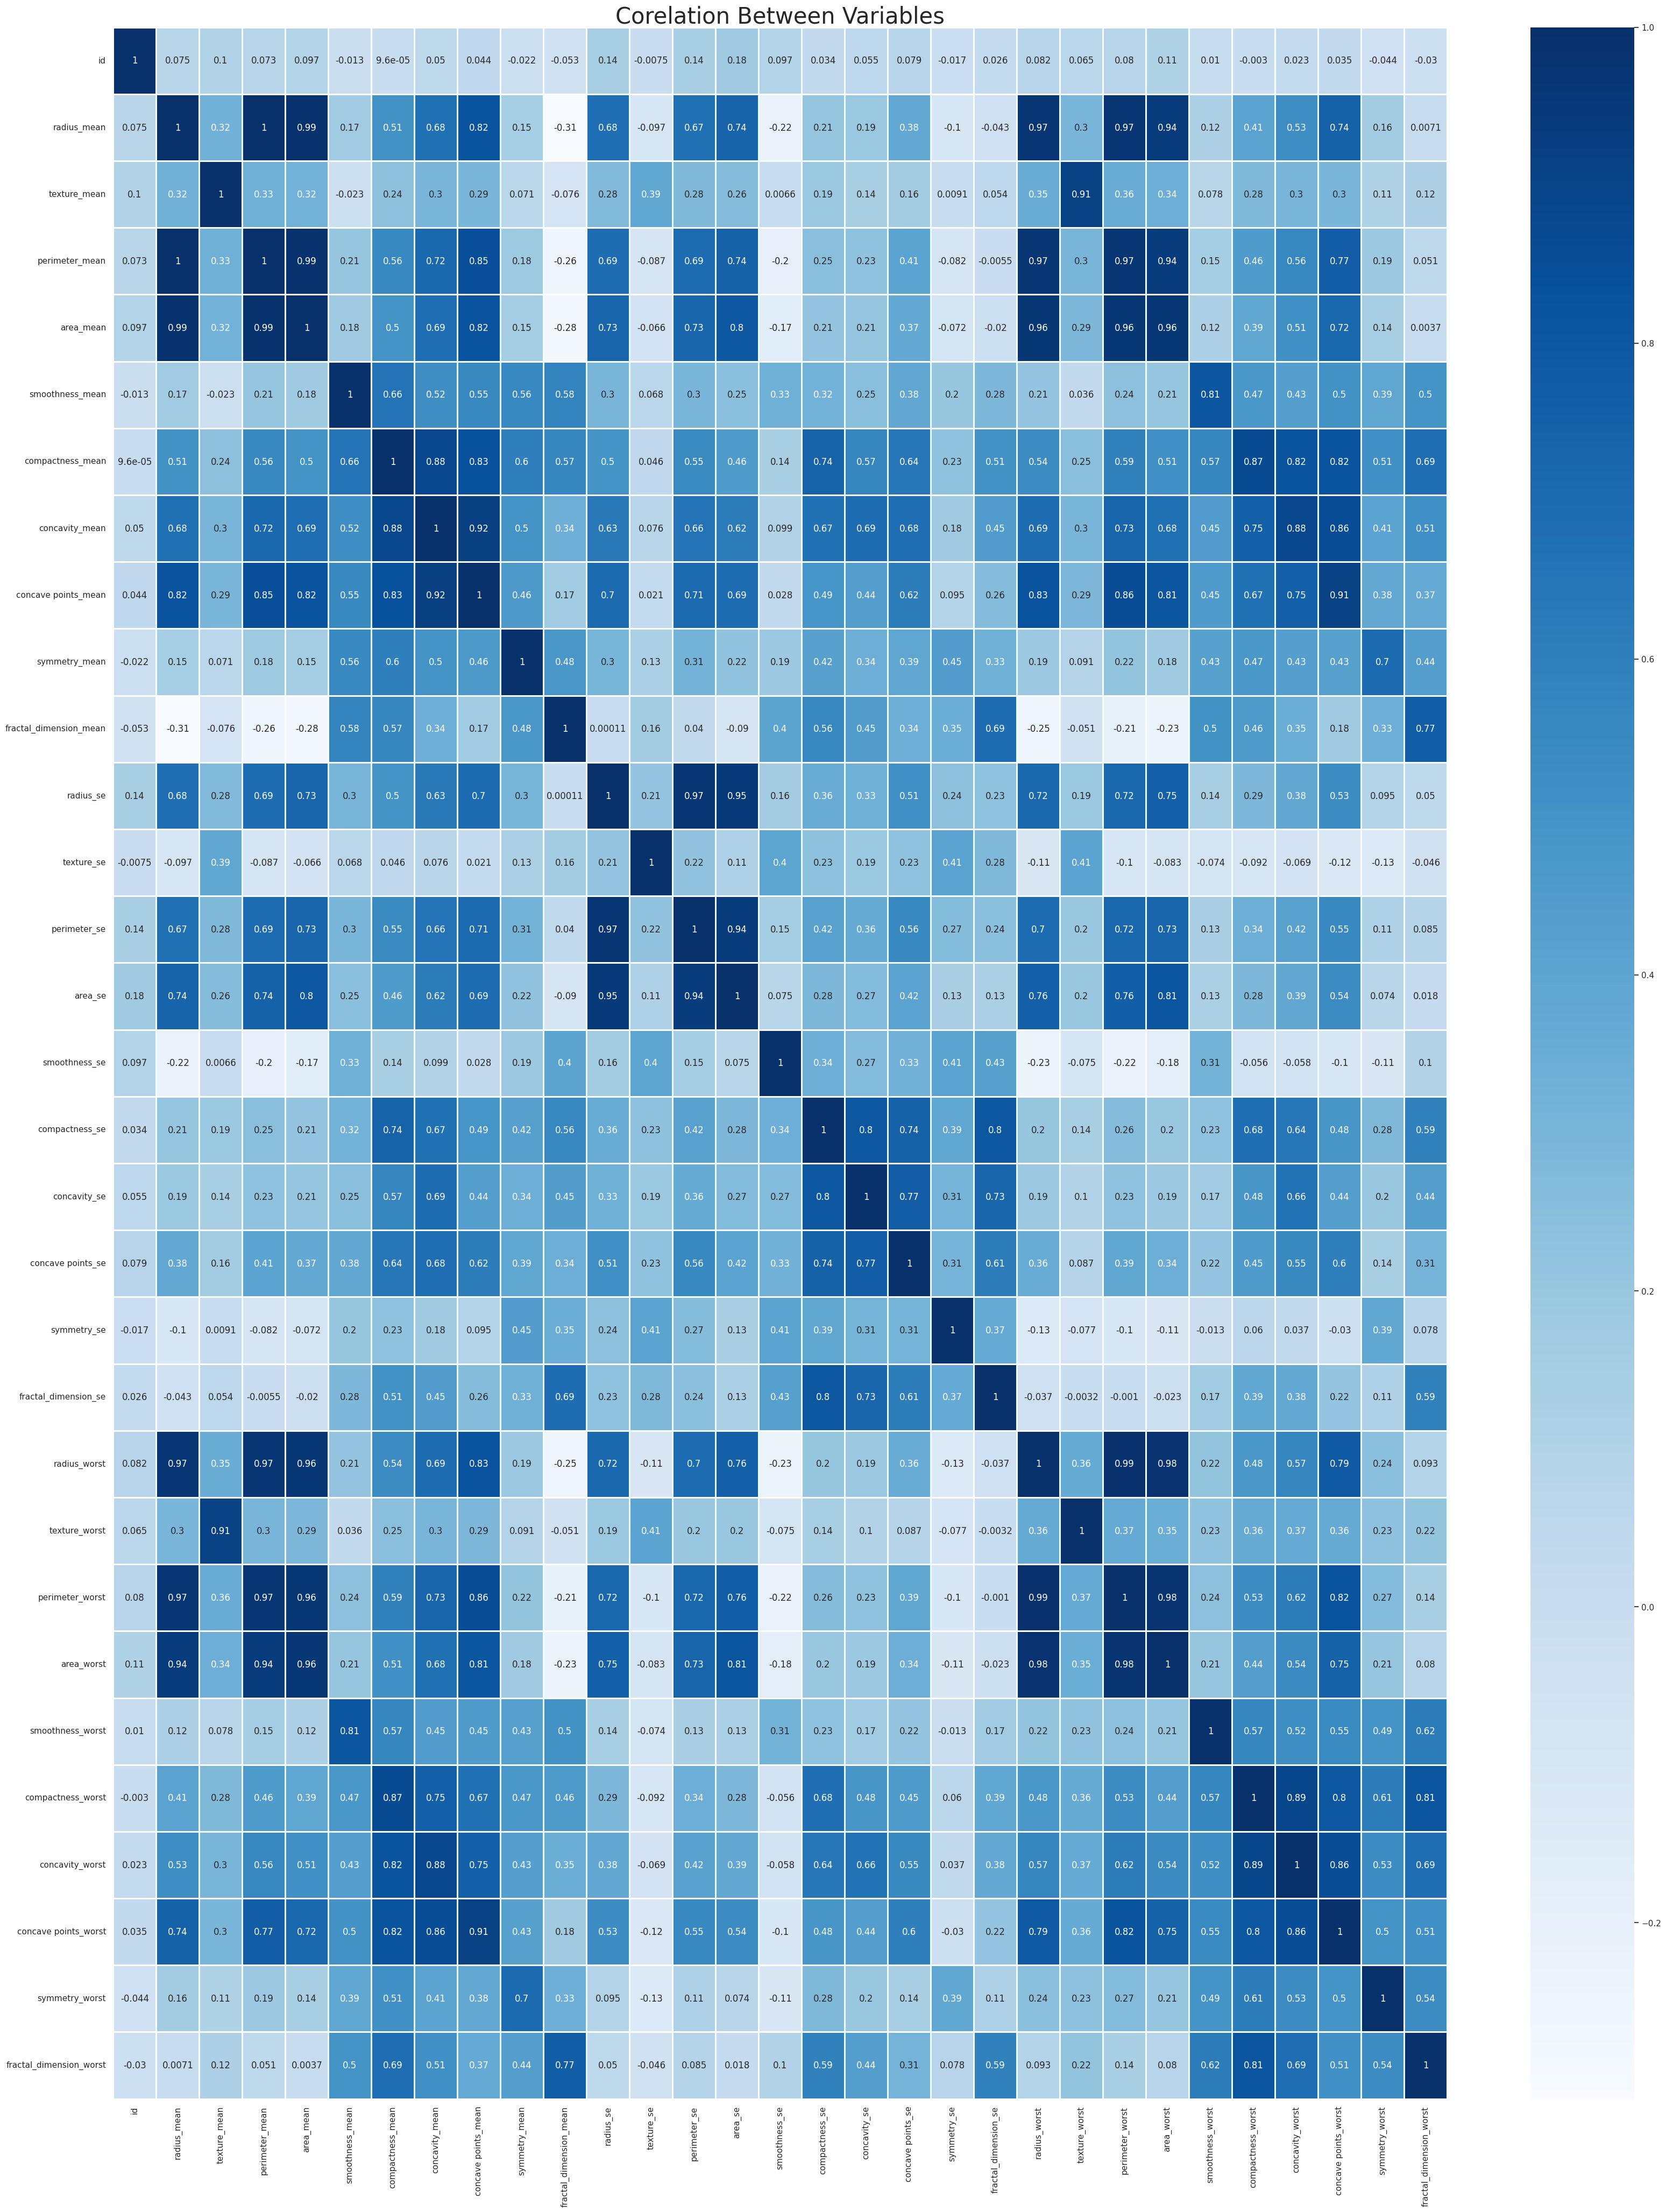

In [22]:
import seaborn as sns

sns.set(style="white")
plt.rcParams['figure.figsize'] = (40, 50)
sns.heatmap(df.corr(), annot = True, linewidths=2, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()



DT: 0.934066 (0.028656)

NB: 0.934066 (0.039925)

SVM: 0.975824 (0.008223)

GBM: 0.958242 (0.022413)

RF: 0.956044 (0.031082)



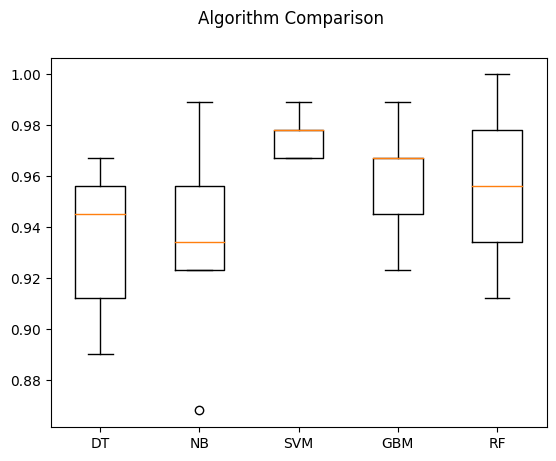

Best Model Accuracy Score on Test Set: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



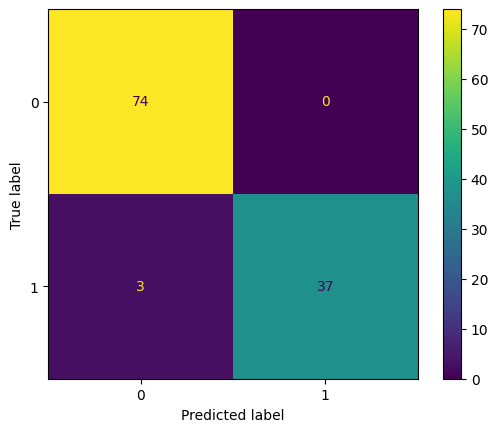

In [5]:
#Testing rf
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

#Check actual/ground truth vs predicted diagnosis
#for x in range(len(y_pred)):
	#print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

DT: 0.929670 (0.029974)

NB: 0.934066 (0.039925)

SVM: 0.975824 (0.008223)

GBM: 0.960440 (0.019160)

RF: 0.960440 (0.028317)



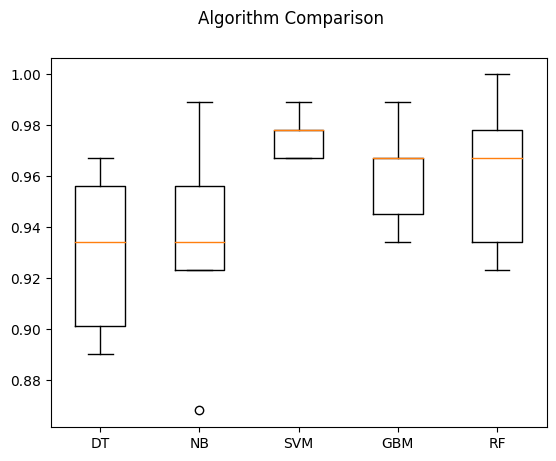

Best Model Accuracy Score on Test Set: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



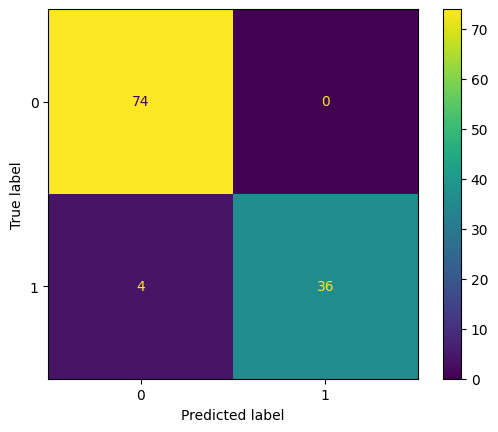

In [7]:
#testing svc
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.887912 (0.017582)

NB: 0.912088 (0.028656)

SVM: 0.942857 (0.028991)

GBM: 0.931868 (0.023466)

RF: 0.934066 (0.029487)



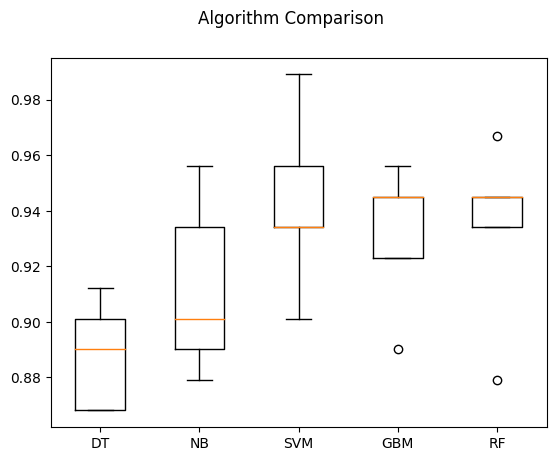

Best Model Accuracy Score on Test Set: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



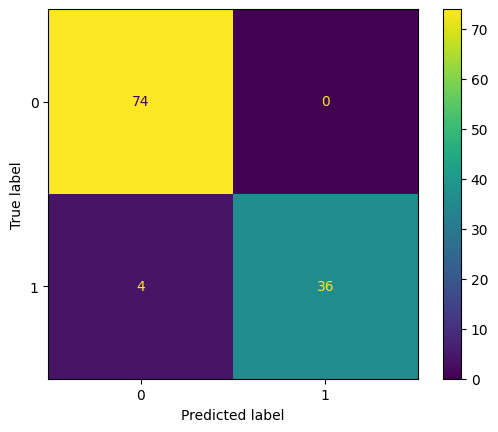

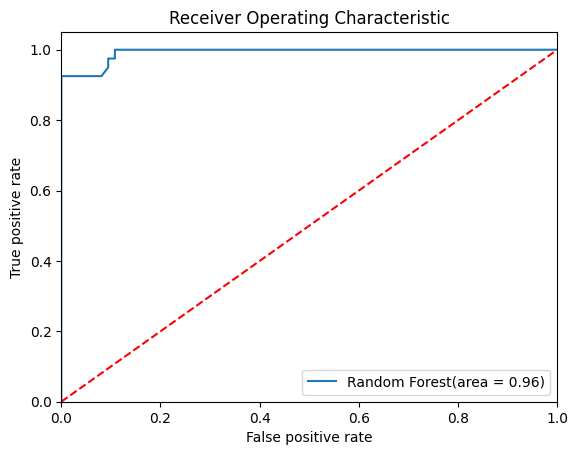

In [ ]:

#Testing to see how accurate the mean is
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(mean, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

#Check actual/ground truth vs predicted diagnosis
# for x in range(len(y_pred)):
	# print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

DT: 0.931868 (0.030612)

NB: 0.940659 (0.033040)

SVM: 0.969231 (0.018906)

GBM: 0.949451 (0.028317)

RF: 0.951648 (0.029157)



Best Model Accuracy Score on Test Set: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



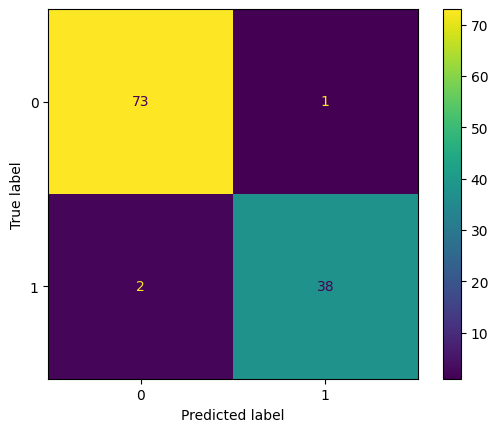

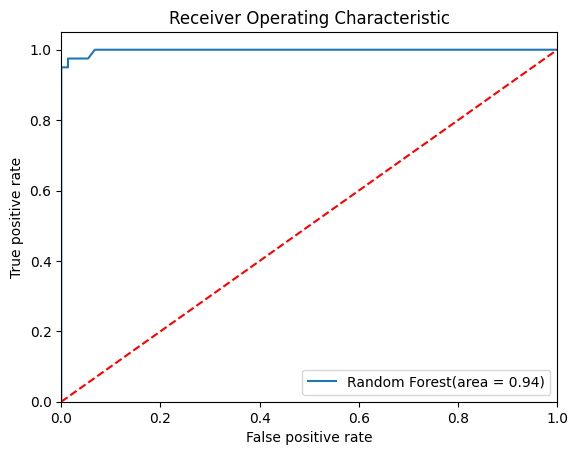

Predicted:  0 Actual:  0 Data:  (134, 96, 130, 161, 37, 18, 29, 46, 213, 87)
Predicted:  1 Actual:  1 Data:  (322, 510, 389, 404, 404, 496, 481, 425, 431, 510)
Predicted:  0 Actual:  0 Data:  (157, 280, 180, 206, 315, 299, 179, 140, 100, 345)
Predicted:  0 Actual:  0 Data:  (43, 44, 40, 46, 178, 65, 21, 17, 437, 273)
Predicted:  0 Actual:  0 Data:  (90, 71, 95, 103, 232, 43, 72, 208, 41, 14)
Predicted:  1 Actual:  1 Data:  (358, 214, 414, 446, 182, 283, 299, 302, 320, 266)
Predicted:  0 Actual:  0 Data:  (219, 38, 297, 276, 240, 337, 295, 212, 336, 297)
Predicted:  0 Actual:  0 Data:  (171, 94, 228, 216, 36, 287, 358, 247, 18, 135)
Predicted:  0 Actual:  1 Data:  (160, 291, 224, 214, 245, 447, 438, 403, 498, 466)
Predicted:  0 Actual:  0 Data:  (140, 332, 196, 172, 139, 281, 194, 83, 92, 226)
Predicted:  1 Actual:  1 Data:  (324, 243, 391, 402, 235, 480, 460, 378, 230, 479)
Predicted:  1 Actual:  1 Data:  (374, 283, 430, 463, 309, 319, 392, 337, 341, 250)
Predicted:  1 Actual:  1 Data:

In [ ]:

#testing to see how accurate the worst is
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(worst, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

#Check actual/ground truth vs predicted diagnosis
# for x in range(len(y_pred)):
# 	print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

DT: 0.854945 (0.018906)

NB: 0.846154 (0.023051)

SVM: 0.868132 (0.027800)

GBM: 0.896703 (0.042617)

RF: 0.879121 (0.042276)



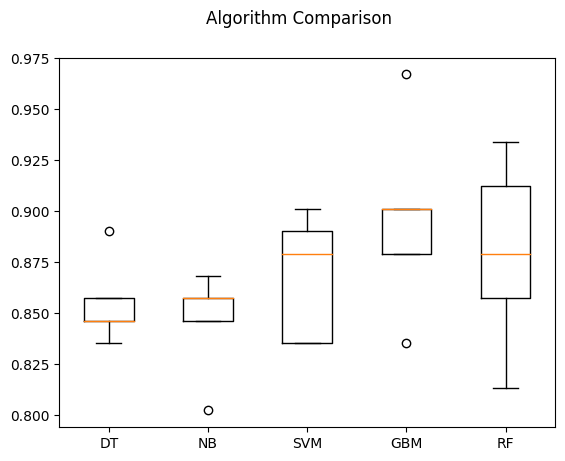

Best Model Accuracy Score on Test Set: 0.8508771929824561
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        74
           1       0.87      0.68      0.76        40

    accuracy                           0.85       114
   macro avg       0.86      0.81      0.83       114
weighted avg       0.85      0.85      0.85       114



In [ ]:
#testing the standard error accuracy
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(se, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

#Check actual/ground truth vs predicted diagnosis
#for x in range(len(y_pred)):
	#print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

DT: 0.905495 (0.021534)

NB: 0.898901 (0.037038)

SVM: 0.914286 (0.039560)

GBM: 0.920879 (0.021308)

RF: 0.912088 (0.037427)



Best Model Accuracy Score on Test Set: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        74
           1       0.97      0.82      0.89        40

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



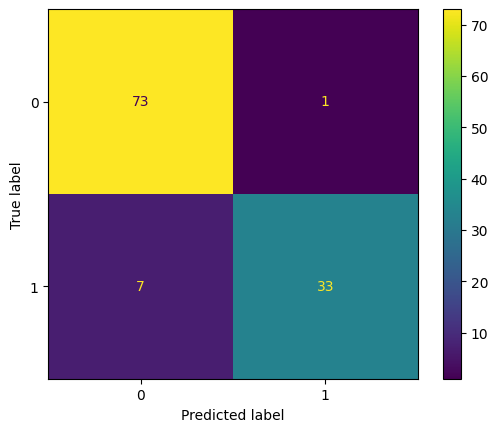

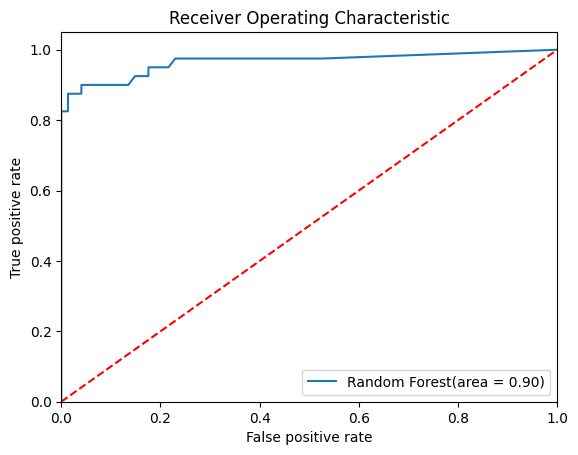

In [ ]:
#testing the radius
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_radius, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.940659 (0.026556)

NB: 0.934066 (0.027800)

SVM: 0.978022 (0.009829)

GBM: 0.960440 (0.024670)

RF: 0.960440 (0.025631)



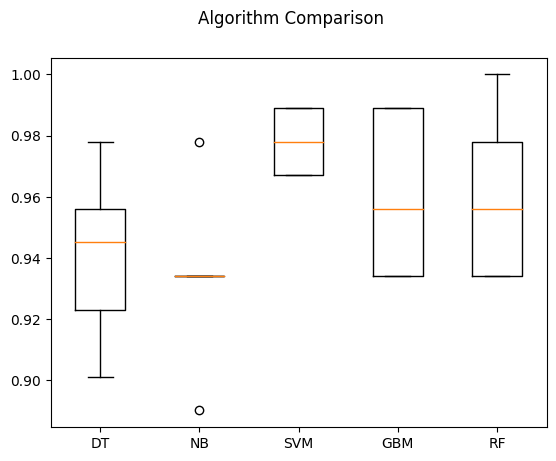

Best Model Accuracy Score on Test Set: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



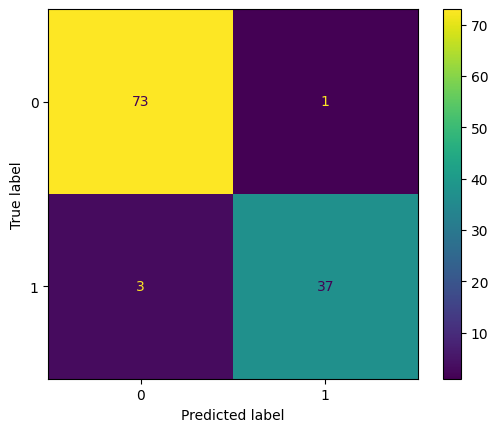

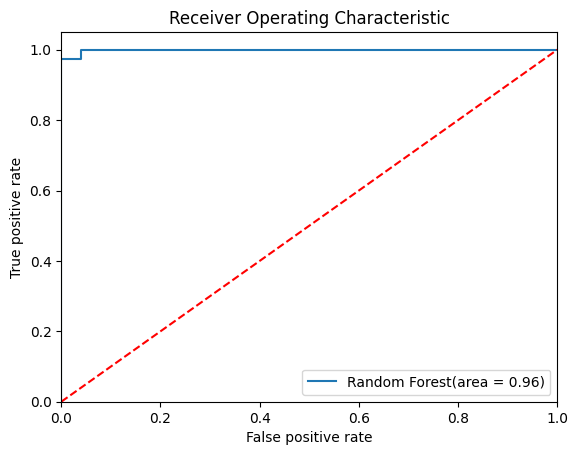

In [ ]:
#testing with no standard error
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(no_se, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.905495 (0.005383)

NB: 0.898901 (0.032894)

SVM: 0.912088 (0.041700)

GBM: 0.923077 (0.018388)

RF: 0.914286 (0.026374)



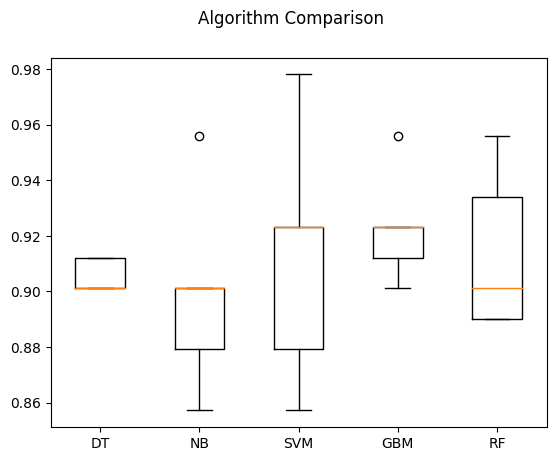

Best Model Accuracy Score on Test Set: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        74
           1       1.00      0.80      0.89        40

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



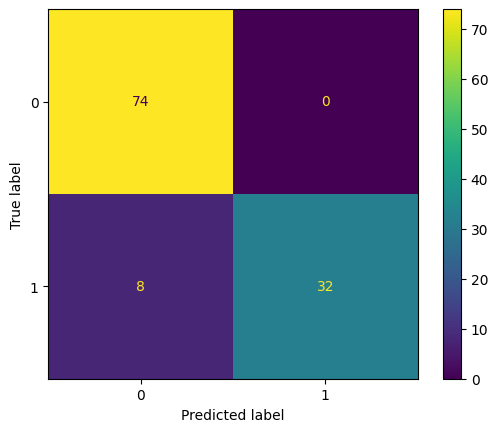

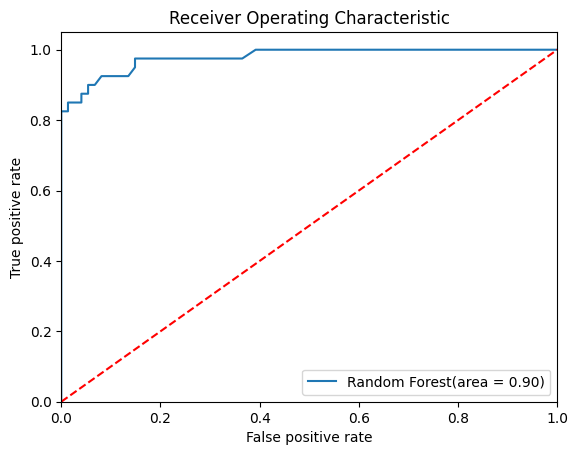

In [ ]:
#tesing the area
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_area, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

In [ ]:
#testing the texture
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_texture, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.676923 (0.066518)

NB: 0.731868 (0.044827)

SVM: 0.747253 (0.019658)

GBM: 0.740659 (0.033040)

RF: 0.764835 (0.023671)



Best Model Accuracy Score on Test Set: 0.7631578947368421
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        74
           1       0.69      0.60      0.64        40

    accuracy                           0.76       114
   macro avg       0.74      0.73      0.73       114
weighted avg       0.76      0.76      0.76       114



In [ ]:
#testing perimeter
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_perimeter, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.905495 (0.011207)

NB: 0.892308 (0.053112)

SVM: 0.912088 (0.045042)

GBM: 0.912088 (0.018388)

RF: 0.923077 (0.026917)



Best Model Accuracy Score on Test Set: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



In [ ]:
#testing smoothness
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_smoothnes, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.639560 (0.029812)

NB: 0.681319 (0.043956)

SVM: 0.756044 (0.051730)

GBM: 0.714286 (0.034750)

RF: 0.712088 (0.039560)



Best Model Accuracy Score on Test Set: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        74
           1       0.95      0.50      0.66        40

    accuracy                           0.82       114
   macro avg       0.87      0.74      0.76       114
weighted avg       0.84      0.82      0.80       114



DT: 0.764835 (0.035845)

NB: 0.760440 (0.062705)

SVM: 0.821978 (0.040166)

GBM: 0.817582 (0.014906)

RF: 0.815385 (0.022413)



Best Model Accuracy Score on Test Set: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        74
           1       0.91      0.78      0.84        40

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



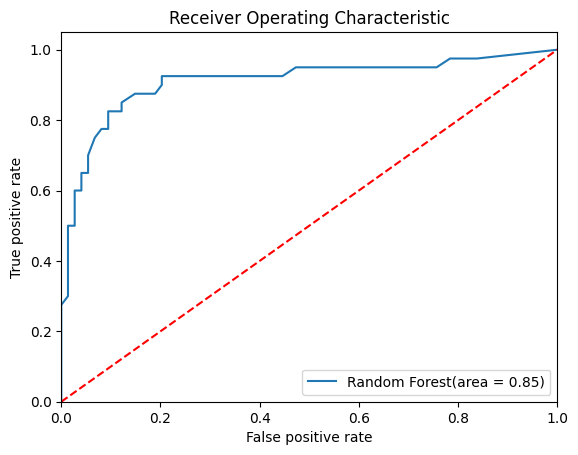

In [ ]:
#testing compactness
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_compactness, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.901099 (0.020850)

NB: 0.892308 (0.017582)

SVM: 0.927473 (0.027451)

GBM: 0.912088 (0.031849)

RF: 0.923077 (0.019658)



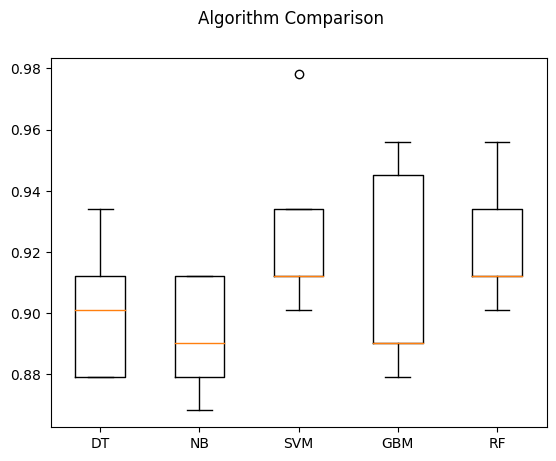

Best Model Accuracy Score on Test Set: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



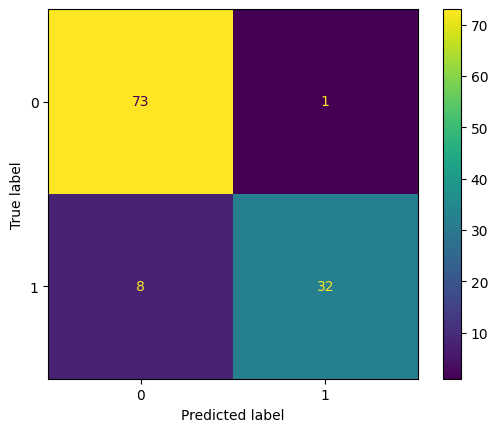

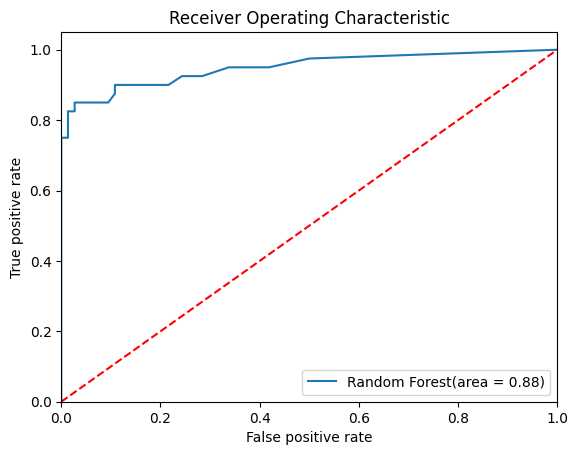

In [ ]:
#testing concave
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_concave, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.881319 (0.023466)

NB: 0.837363 (0.036380)

SVM: 0.912088 (0.030295)

GBM: 0.907692 (0.024670)

RF: 0.905495 (0.017855)



Best Model Accuracy Score on Test Set: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        74
           1       0.89      0.85      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



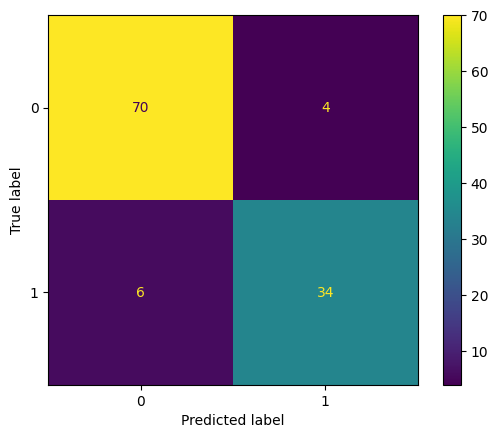

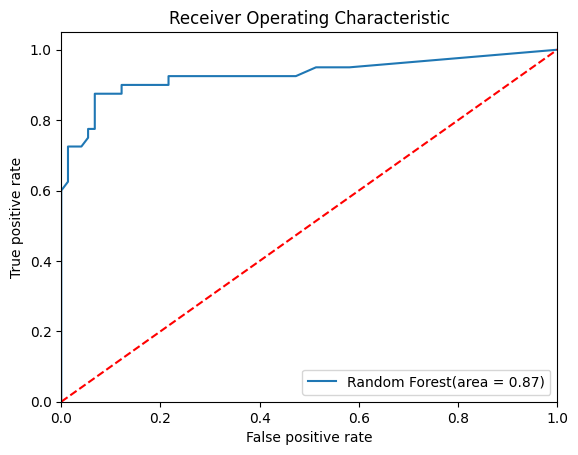

In [ ]:
#testing concavity
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_concavity, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.674725 (0.021534)

NB: 0.692308 (0.051543)

SVM: 0.756044 (0.070672)

GBM: 0.742857 (0.057564)

RF: 0.751648 (0.053655)



Best Model Accuracy Score on Test Set: 0.7719298245614035
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        74
           1       0.79      0.47      0.59        40

    accuracy                           0.77       114
   macro avg       0.78      0.70      0.72       114
weighted avg       0.78      0.77      0.75       114



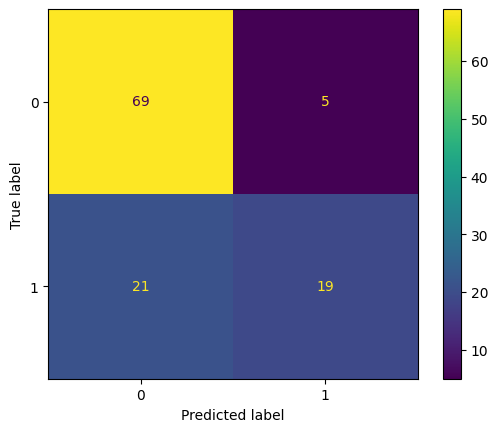

In [ ]:
#testing symmetry
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_symmetry, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

DT: 0.705495 (0.040763)

NB: 0.659341 (0.042843)

SVM: 0.764835 (0.022628)

GBM: 0.769231 (0.023051)

RF: 0.764835 (0.026556)



Best Model Accuracy Score on Test Set: 0.8245614035087719
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        74
           1       0.86      0.60      0.71        40

    accuracy                           0.82       114
   macro avg       0.84      0.77      0.79       114
weighted avg       0.83      0.82      0.82       114



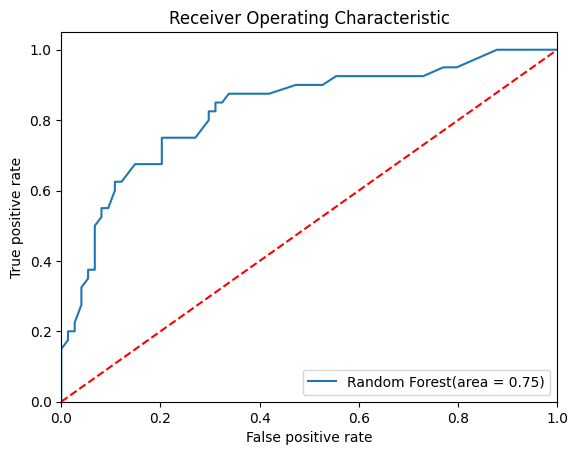

In [ ]:
#testing fractal dimensions
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(all_fractdim, y, test_size = 0.20, random_state=seed)
#Check with  different Scikit-learn classification algorithms
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# # evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	msg += '\n'
	print(msg)
#
# # Compare Algorithms' Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#
#
# # Make predictions on validation/test dataset
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
svc =SVC()

best_model = svc
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
model_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy Score on Test Set:", model_accuracy)

# #Model Evaluation Metric 1
print(classification_report(y_test, y_pred))

#Model Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()